# Nonlinear vibrations<br>Part 2

## Van der Pol equation

### Limiting cycle

Method of averaging:

Van der Pol equation for autonomous system with negative damping

$$\ddot{x}-\epsilon(1-x^2)\dot{x}+x=0$$

Use method of averaging to estimate amplitude in case of small nonlinearity $\epsilon \ll 1$:

\begin{aligned}
x&=r\cos(t+\phi)\\
\dot{x}&=-r\sin(t+\phi)\\
\ddot{x}&=-\dot{r}\sin(t+\phi)-r\dot{\phi}\cos(t+\phi)-x
\end{aligned}

where equation for $\dot{x}$ holds if
$$\dot{r}\cos(t+\phi)-r\dot{\phi}\sin(t+\phi)=0$$

Substituting these equations into van der Pol equation yields

$$\dot{r}\sin(t+\phi)+r\dot{\phi}\cos(t+\phi)=-\epsilon(1-x^2)\dot{x}$$

The system can be solved for $\dot{r}$ and $\dot{\phi}$

\begin{aligned}
\dot{r}&=-\epsilon\sin(t+\phi)(1-x^2)\dot{x}\\
\dot{\phi}&=-\frac{1}{r}\epsilon\cos(t+\phi)(1-x^2)\dot{x}
\end{aligned}

Let $\tau=t+\phi$ and $\phi$ is considered almost constant in comparison with $t$ on period of $\sin t$. In this case

\begin{aligned}
\dot{r}&\approx-\epsilon r\frac{1}{2\pi}\int_0^{2\pi}\sin\tau\cdot(1-r^2\cos^2\tau)\sin\tau d\tau=\epsilon\frac{r}{2} \left(1-\frac{r^2}{4}\right)\\
\dot{\phi}&\approx-\epsilon\frac{1}{2\pi}\int_0^{2\pi}\cos\tau\cdot(1-r^2\cos^2\tau)\sin\tau d\tau=0
\end{aligned}

Staedy state solutions to $\dot{r}=0$ are $r=0$ and $r=2$ amplitudes. The first one is unstable singular point and $r=2$ corresponds to a stable limiting cycle.

$$\dot{r}=\epsilon\frac{r}{2} \left(1-\frac{r^2}{4}\right)\quad\implies\quad\frac{dr}{\frac{r}{2}\left(1-\left(\frac{r}{2}\right)^2\right)}=\epsilon dt$$

$$z=\frac{r}{2}, \quad \frac{2 dz}{z(1-z^2)}=\epsilon dt$$

$$\frac{2}{z(1-z^2)}=\frac{2}{z}-\left(\frac{1}{z-1}+\frac{1}{z+1}\right)$$

$$2\int_{z_0}^z\frac{dz}{z}-\left(\int_{z_0}^z\frac{dz}{z-1}+\int_{z_0}^z\frac{dz}{z+1}\right)=\epsilon t$$

$$2\log\frac{z}{z_0}-\left(\log\frac{z-1}{z_0-1}+\log\frac{z+1}{z_0+1}\right)=\epsilon t$$

$$\frac{z_0^2}{z_0^2-1}\cdot\frac{z^2-1}{z^2}=e^{-\epsilon t}$$

$$1-\frac{4}{r^2}=\left(1-\frac{4}{r_0^2}\right)e^{-\epsilon t}$$

$$r=\frac{2}{\sqrt{1-\left(1-4/r_0^2\right)e^{-\epsilon t}}}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp

In [2]:
r, phi, eps, t = sp.symbols('r, \phi, \epsilon, t')

In [3]:
x  =  r * sp.cos(t)
dx = -r * sp.sin(t)

F = eps * (1 - x**2) * dx

dr   = -sp.sin(t) * F
dphi = -sp.cos(t) * F

In [4]:
F

-\epsilon*r*(-r**2*cos(t)**2 + 1)*sin(t)

In [5]:
eq1 = (sp.integrate(dr, (t, 0, 2*sp.pi))/2/sp.pi).simplify()
eq1

\epsilon*r*(4 - r**2)/8

In [6]:
sp.integrate(dphi, (t,0,2*sp.pi))

0

## Relaxation oscillations



### Rayleigh's equation to van de Pol relation

$$\ddot{u}-\epsilon\left(\dot{u}-\frac{1}{3}\dot{u}^3\right)+u=0$$

differentiate Rayleigh's equation:

$$\dddot{u}-\epsilon\left(\ddot{u}-\dot{u}^2\ddot{u}\right)+\dot{u}=0$$

and sybstituying $\dot{u} = v$ results in van der Pol equation:

$$\ddot{v}-\epsilon(1-v^2)\dot{v}+v=0$$

### limiting cycle

substitution

$$\dot{u} = v,\quad\xi=u/\epsilon,\quad\dot{\xi}=v/\epsilon$$

into Rayleigh's eqyation gives 1st order system of equations:

\begin{aligned}
\frac{1}{\epsilon}\dot{v}&=v-\frac{1}{3}v^3-\xi\\
\dot{\xi}&=\frac{v}{\epsilon}
\end{aligned}

Equation for the trajectories on phase plane:

$$\frac{1}{\epsilon^2}\frac{dv}{d\xi}=\frac{v-v^3/3-\xi}{v}$$

<center><img src="limiting-cycle.png" width="100%" height="auto" alt="limiting cycle in case of relaxation oscillations"/></center>

### Period
Limiting cycle $\xi=v-\frac{1}{3}v^3$. From $\dot{\xi}=v/\epsilon$ find
$$dt=\epsilon\frac{d\xi}{v}$$

Period can be estimates as integral over the limiting circle.
The symmetry of the curve can be taken into account as well:

$$T=\epsilon\oint\frac{d\xi}{v}=2\epsilon\int_{v_1}^{v_2}\frac{d\xi}{v}=2\epsilon\int_{v_1}^{v_2}\left(\frac{1}{v}-v\right)dv$$

Find the integral limits. Point $v_2$ corresponds to equation $\dot{\xi}=1-v_2^2=0$, thus $v_2=\pm 1$.

Another point can be found from equation
$$\xi(-1)=-2/3=v_1-v_1^3/3$$

$$v_1^3-3v_1-2=0\quad\implies\quad v_1=2$$

$$T=2\epsilon\int_2^1\left(\frac{1}{v}-v\right)dv=2\epsilon\left(\frac{3}{2}-\log 2\right)\approx 1.614\epsilon$$

## Numerical solution

In [3]:
# for numerical integration
def vdp(z, t, e):
    return [ z[1], -z[0] + e*(1-z[0]**2)*z[1] ]

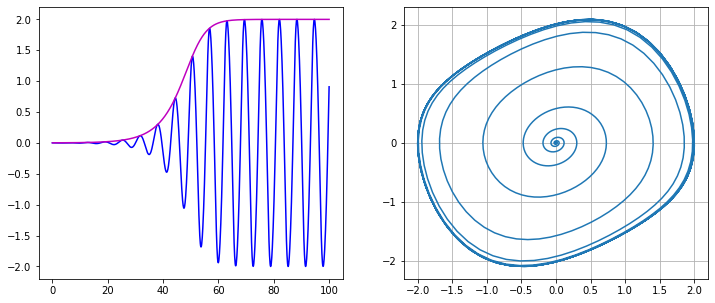

In [15]:
eps = 0.3
r0  = 1e-3

t = np.linspace(0, 100, 1000)
sol = odeint(vdp, [r0, 0], t, args=(eps,))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:,0], 'b',
         t, 2/np.sqrt(1-(1-4/r0**2)*np.exp(-eps*t)), 'm')
plt.subplot(1,2,2)
plt.plot(sol[:,0], sol[:,1])
plt.grid(True)
plt.show()

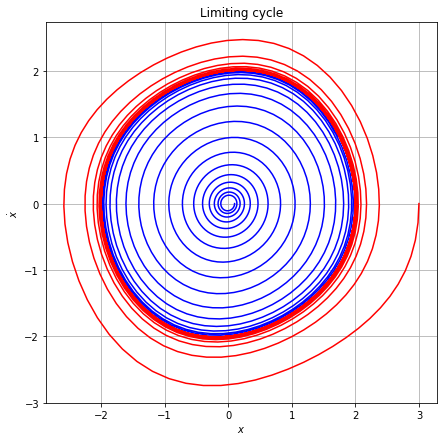

In [12]:
t = np.linspace(0, 100, 1000)

sol1 = odeint(vdp, [0.1, 0], t, args=(0.1,))
sol2 = odeint(vdp, [3.0, 0], t, args=(0.1,))

plt.figure(figsize=(7,7))
plt.plot(sol1[:,0],sol1[:,1],'b',sol2[:,0],sol2[:,1],'r')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.title('Limiting cycle')
plt.show()

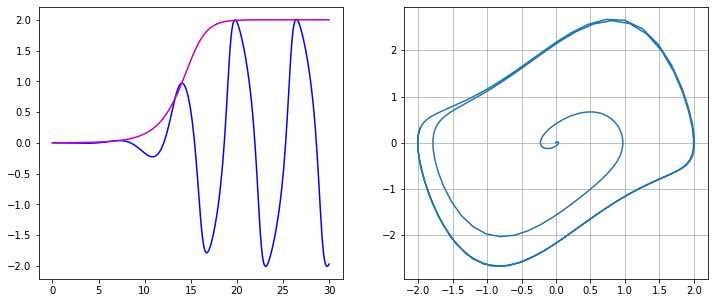

In [16]:
r0 = 1e-3
eps = 1

t = np.linspace(0, 30, 300)
sol = odeint(vdp, [r0, 0], t, args=(eps,))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:,0], 'b',
         t, 2/np.sqrt(1-(1-4/r0**2)*np.exp(-eps*t)), 'm')
plt.subplot(1,2,2)
plt.plot(sol[:,0], sol[:,1])
plt.grid(True)
plt.show()

Relaxation oscillations similar to multivibrator at $\epsilon \gg 1$.

Period depends on $\epsilon$.

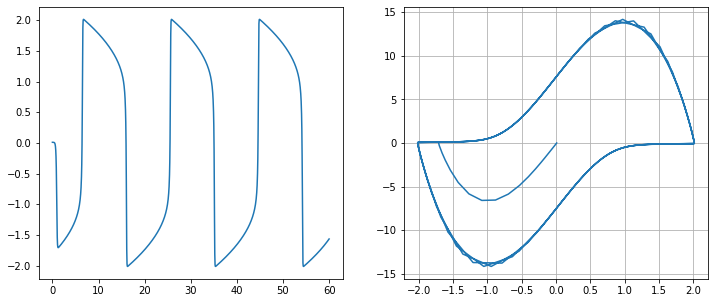

In [14]:
r0 = 0.01
eps = 10

t = np.linspace(0, 60, 2000)
sol = odeint(vdp, [r0, 0], t, args=(eps,))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:,0])
plt.subplot(1,2,2)
plt.plot(sol[:,0], sol[:,1])
plt.grid(True)
plt.show()

## Notes

"Dynamics of a System Exhibiting the Global Bifurcation of a Limit Cycle at Infinity" by W.L.Keith and R.H.Rand, Int. J. Non-Linear Mechanics, 20:325-338 (1985)